# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


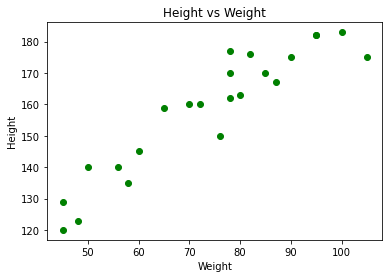

In [4]:
plt.scatter(df['Weight'], df['Height'], color = 'g')
plt.title('Height vs Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
# DIvide the features into dependent and independt features 
#Considering weight as Independent varibale
X = df[['Weight']] #Independent 
y = df[['Height']] #dependent 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 1) (5, 1) (18, 1) (5, 1)


In [9]:
#Standardizing the dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train) #it will aplly z-score formula by calculating mean and SD

In [11]:
X_test=scaler.transform(X_test) #it will apply z-score by using above mean and SD

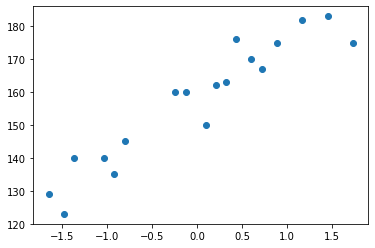

In [12]:
plt.scatter(X_train,y_train)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# model.fit(X_train_Scaled,y_train)
model.fit(X_train,y_train)

LinearRegression()

In [15]:
print('the slope/coefficient of weight : ', model.coef_)   #slope of the best fit line

the slope/coefficient of weight :  [[17.03440872]]


In [16]:
print('the intercepet : ', model.intercept_)  #when x = 0, the best fit line intercepet at this value 

the intercepet :  [157.5]


In [34]:
y_pred = model.predict(X_train)
y_pred

array([[187.0869102 ],
       [141.82375282],
       [182.27168069],
       [161.08467086],
       [132.19329381],
       [177.45645118],
       [129.3041561 ],
       [143.74984463],
       [153.38030364],
       [159.15857905],
       [134.11938561],
       [139.89766102],
       [155.30639545],
       [172.64122168],
       [164.93685446],
       [167.82599217],
       [169.75208397],
       [163.01076266]])

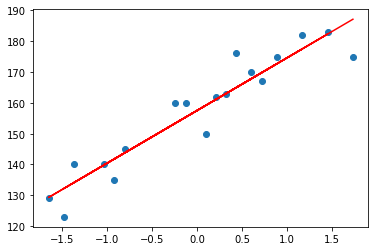

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train), color = 'r')
plt.show()

In [35]:
y_pred_test = model.predict(X_test)
y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [36]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

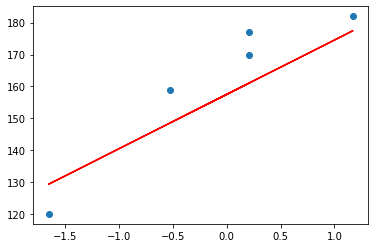

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test), color = 'r')
plt.show()

# Performance Metrix 

In [38]:
#MSE, #MAE, RMSE, #r2

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse,mae,rmse)

109.77592599051654 9.822657814519227 10.477400726827076


In [40]:
#Accuracy 
acc = r2_score(y_test,y_pred_test)

In [41]:
acc  

0.7769869860423441

In [43]:
#Adj. r2_score 

adj_r2 = 1-(1-acc)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [44]:
adj_r2

0.7026493147231254

# Assumptions

1. New data Point = 80

In [47]:
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\yashw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [49]:
model.predict(scaled_weight)

array([[163.01076266]])

In [50]:
print('The hight for a new weight is : ', model.predict(scaled_weight))

The hight for a new weight is :  [[163.01076266]]


## should be linear

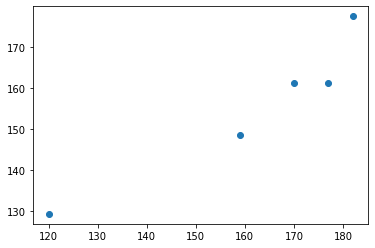

In [52]:
plt.scatter(y_test,y_pred_test)
plt.show()  #should be linear

2. Residuals 

In [54]:
residuals = y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


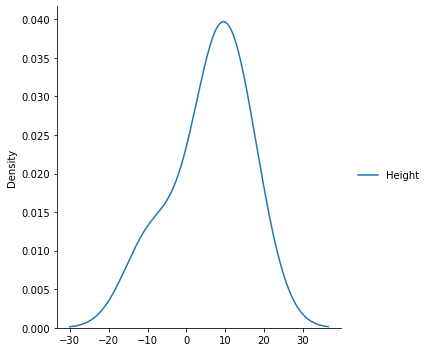

In [58]:
sns.displot(residuals, kind = 'kde')
plt.show()

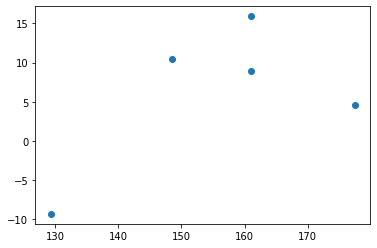

In [60]:
plt.scatter(y_pred_test, residuals)
plt.show()